In [2]:
import pandas as pd
from plotnine import *
import numpy as np

from matplotlib import pyplot as pyplt
pyplt.rcParams['text.usetex'] = True
pyplt.rcParams['font.family'] = 'sans-serif'

In [3]:
course_info = pd.read_csv("./Storage in University Courses (THE and csrankings) - CCGRID 24 - Course per topic.csv").drop(columns=["Characteristics"])
course_info

,Ranking,University,Abbreviation,Course,Filesystems,Flash,FTL,NVMe,Key-Value,Persistent Memory,Disaggregation,Storage API,Distributed Storage,URLs
0,NaN,UW Madison,UW Madison,"Introduction to Big Data Systems, \nAdvanced O...","OS, Other",OS,NaN,NaN,NaN,NaN,NaN,NaN,DS,[bigdata](https://tyler.caraza-harter.com/cs54...
1,NaN,UC Santa Cruz,UC Santa Cruz,Storage Systems,Storage Systems,Storage Systems,Storage Systems,Storage Systems,Storage Systems,NaN,NaN,Storage Systems,Storage Systems,[sto](https://users.soe.ucsc.edu/%7Ecarlosm/cm...
2,NaN,UC San Diego,UC San Diego,Modern Storage Systems,Modern Storage Systems,Modern Storage Systems,Modern Storage Systems,Modern Storage Systems,Modern Storage Systems,NaN,NaN,Modern Storage Systems,Modern Storage Systems,[sto](https://swanson.ucsd.edu/modern-storage-...
3,NaN,UC Santa Barbara,UC Santa Barbara,Advanced Topics in OS,OS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DS,[os](https://sites.cs.ucsb.edu/~rich/class/cs2...
4,NaN,KAIST,KAIST,Advanced Operating Systems,OS,OS,NaN,NaN,NaN,NaN,NaN,NaN,"OS, DS",[os](https://oslab.kaist.ac.kr/ee817-fall-2021...
5,NaN,Uni. of Chicago,UChicago,"Advanced Operating Systems, Advanced Distribut...",OS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OS, DS",[os](https://www.classes.cs.uchicago.edu/archi...
6,NaN,Uni. of Michigan,UMichigan,Advanced Operating Systems,OS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OS, DS",[os](https://web.eecs.umich.edu/~ryanph/eecs58...
7,NaN,Purdue University,Purdue University,"Databases, Distributed Systems",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DS,[catalog](https://catalog.purdue.edu/preview_e...
8,NaN,Shanghai Jiao Tong Uni.,Shanghai Jiao Tong,Computer Systems Principles,Other,Other,NaN,Other,NaN,NaN,NaN,NaN,Other,[os](https://ipads.se.sjtu.edu.cn/courses/csp/...
9,NaN,UC Riverside,UC Riverside,Advanced Operating Systems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OS,[os](https://www.cs.ucr.edu/~heng/teaching/cs2...


In [4]:
# Unis without any storage course
course_info[["Filesystems", "Flash", "FTL", "NVMe", "Key-Value", "Persistent Memory", "Disaggregation", "Storage API", "Distributed Storage"]].isna().all(axis=1).sum()


10

In [5]:
def rotate_text(grp):
    i1 = grp.group(0)
    if i1 == "":
        return ""
    return "\\rotatebox[origin=c]{90}{" + i1 + "}"

topics = ["Filesystems", "Flash", "FTL", "NVMe", "Key-Value", "Persistent Memory", "Disaggregation", "Storage API", "Distributed Storage"]
courses_latex = course_info[["Abbreviation", "Filesystems", "Flash", "FTL", "NVMe", "Key-Value", "Persistent Memory", "Disaggregation", "Storage API", "Distributed Storage"]].reset_index(drop=True)
courses_latex[topics] = courses_latex[topics].notnull().astype(str)
courses_latex = courses_latex.replace("True", "\checkmark")
courses_latex = courses_latex.replace("False", "")
courses_latex.loc[courses_latex["Abbreviation"] == "Peking", topics] = "?"
courses_latex.loc[courses_latex["Abbreviation"] == "UToronto", topics] = "?"
courses_latex["Abbreviation"] = courses_latex["Abbreviation"].str.replace(".*", repl=rotate_text)
courses_latex = courses_latex.transpose().rename(index={"Filesystems": "FS",
                                       "Key-Value": "KV",
                                       "Persistent Memory": "PMem",
                                       "Disaggregation": "Disagg.",
                                       "Storage API": "API",
                                       "Distributed Storage": "Dist."})
print(courses_latex.to_latex(header=None, escape=False))
courses_latex

\begin{tabular}{llllllllllllllllllllllllllllllllllll}
\toprule
Abbreviation &  \rotatebox[origin=c]{90}{UW Madison} &  \rotatebox[origin=c]{90}{UC Santa Cruz} &  \rotatebox[origin=c]{90}{UC San Diego} &  \rotatebox[origin=c]{90}{UC Santa Barbara} &  \rotatebox[origin=c]{90}{KAIST} &  \rotatebox[origin=c]{90}{UChicago} &  \rotatebox[origin=c]{90}{UMichigan} &  \rotatebox[origin=c]{90}{Purdue University} &  \rotatebox[origin=c]{90}{Shanghai Jiao Tong} &  \rotatebox[origin=c]{90}{UC Riverside} &  \rotatebox[origin=c]{90}{Oxford} &  \rotatebox[origin=c]{90}{MIT} &  \rotatebox[origin=c]{90}{Stanford} &  \rotatebox[origin=c]{90}{ETH} &  \rotatebox[origin=c]{90}{CMU} &  \rotatebox[origin=c]{90}{Cambridge} &  \rotatebox[origin=c]{90}{NUS} &  \rotatebox[origin=c]{90}{UC Berkeley} &  \rotatebox[origin=c]{90}{Harvard} &  \rotatebox[origin=c]{90}{TU Munich} &  \rotatebox[origin=c]{90}{Imperial} &  \rotatebox[origin=c]{90}{Princeton} &  \rotatebox[origin=c]{90}{Tsinghua} &  \rotatebox[origin=c]{90}

/var/folders/jp/kcn5ldrd1279m_wgrm1vvnvr0000gn/T/ipykernel_76625/647229643.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
/var/folders/jp/kcn5ldrd1279m_wgrm1vvnvr0000gn/T/ipykernel_76625/647229643.py:21: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
Abbreviation,\rotatebox[origin=c]{90}{UW Madison},\rotatebox[origin=c]{90}{UC Santa Cruz},\rotatebox[origin=c]{90}{UC San Diego},\rotatebox[origin=c]{90}{UC Santa Barbara},\rotatebox[origin=c]{90}{KAIST},\rotatebox[origin=c]{90}{UChicago},\rotatebox[origin=c]{90}{UMichigan},\rotatebox[origin=c]{90}{Purdue University},\rotatebox[origin=c]{90}{Shanghai Jiao Tong},\rotatebox[origin=c]{90}{UC Riverside},...,\rotatebox[origin=c]{90}{Cornell},\rotatebox[origin=c]{90}{GaTech},\rotatebox[origin=c]{90}{UIUC},\rotatebox[origin=c]{90}{Caltech},\rotatebox[origin=c]{90}{Peking},\rotatebox[origin=c]{90}{Columbia},\rotatebox[origin=c]{90}{EPFL},\rotatebox[origin=c]{90}{UToronto},\rotatebox[origin=c]{90}{UEdinburg},\rotatebox[origin=c]{90}{NYU}
FS,\checkmark,\checkmark,\checkmark,\checkmark,\checkmark,\checkmark,\checkmark,,\checkmark,,...,,,\checkmark,,?,,,?,,\checkmark
Flash,\checkmark,\checkmark,\checkmark,,\checkmark,,,,\checkmark,,...,,,\checkmark,,?,,,?,,
FTL,,\checkmark,\checkmark,,,,,,,,...,,,,,?,,,?,,
NVMe,,\checkmark,\checkmark,,,,,,\checkmark,,...,,,\checkmark,,?,,,?,,
KV,,\checkmark,\checkmark,,,,,,,,...,,,\checkmark,,?,,,?,,
PMem,,,,,,,,,,,...,,,,,?,,,?,,
Disagg.,,,,,,,,,,,...,,,,,?,,,?,,
API,,\checkmark,\checkmark,,,,,,,,...,,,\checkmark,,?,,,?,,
Dist.,\checkmark,\checkmark,\checkmark,\checkmark,\checkmark,\checkmark,\checkmark,\checkmark,\checkmark,\checkmark,...,,\checkmark,\checkmark,,?,,,?,,\checkmark


In [6]:
course_names = ["Storage", "OS", "DS", "Database", "Other"]
aggregated = []
for topic in topics:
    prev = np.full(len(course_info), False)
    
    for course in ["Storage", "OS", "DS", "Database", "Other"]:
        current_with_replacement = course_info[topic].str.contains(course)
        current = current_with_replacement & ~prev
        
        topic_in_courses = current_with_replacement.sum()
        
        aggregated.append({
            "topic": topic,
            "course": course,
            "count": current.sum(),
            "count_with_replacement": current_with_replacement.sum()
        })
        
        prev = current | prev

In [14]:
aggdf = pd.DataFrame(aggregated)
# aggdf["topic"] = aggdf["topic"].str.replace("Filesystems", "Filesystem")
# aggdf["topic"] = aggdf["topic"].str.replace("Distributed Storage", "Dist. Storage")
# aggdf["topic"] = aggdf["topic"].str.replace("Key-Value", "KV")
aggdf["topic"] = pd.Categorical(aggdf["topic"], reversed(topics), ordered=True)
aggdf["course"] = pd.Categorical(aggdf["course"], reversed(course_names), ordered=True)
aggdf["cumsum"] = aggdf.groupby(["topic"])["count"].cumsum()
aggdf["countlabel"] = aggdf["count"].astype(str)
aggdf.loc[aggdf["countlabel"] == "0", "countlabel"] = None
aggdf

,topic,course,count,count_with_replacement,cumsum,countlabel
0,Filesystems,Storage,4,4,4,4
1,Filesystems,OS,9,9,13,9
2,Filesystems,DS,0,0,13,None
3,Filesystems,Database,0,0,13,None
4,Filesystems,Other,1,2,14,1
5,Flash,Storage,5,5,5,5
6,Flash,OS,3,3,8,3
7,Flash,DS,0,0,8,None
8,Flash,Database,0,0,8,None
9,Flash,Other,2,2,10,2


In [8]:
brewer_colors = ["#7b3294", "#c2a5cf", "#f7f7f7", "#a6dba0", "#008837"]

/Users/sacheendra/miniconda3/envs/thesis/lib/python3.11/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6 x 2.5 in image.
/Users/sacheendra/miniconda3/envs/thesis/lib/python3.11/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: stosys_universities_survey.pdf
/Users/sacheendra/miniconda3/envs/thesis/lib/python3.11/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_label : Removed 13 rows containing missing values.
/Users/sacheendra/miniconda3/envs/thesis/lib/python3.11/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_label : Removed 13 rows containing missing values.


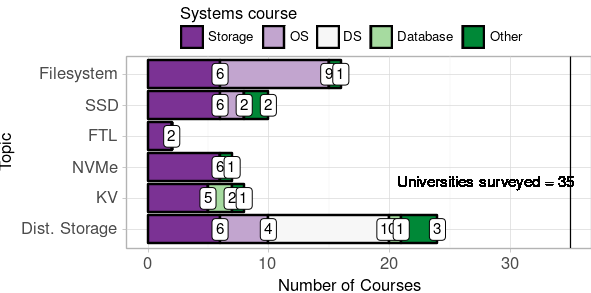

<ggplot: (731741677)>

In [312]:
plt = ggplot(aggdf) +\
    theme_light(base_size=12, base_family="sans-serif") +\
    geom_bar(aes(x="topic", fill="course", y="count"), stat=stat_sum, color="black", size=1) +\
    geom_label(aes(x="topic", y="cumsum", label="countlabel")) +\
    geom_text(x=2.5, y=28.1, label="Universities surveyed = 35") +\
    geom_hline(yintercept=35) +\
    coord_flip() +\
    scale_fill_manual(values=brewer_colors, 
                      breaks=course_names) +\
    guides(fill=guide_legend(title="Systems course")) +\
    theme(legend_position=(0.5, 1), figure_size=(6, 2.5), axis_text=element_text(size=12),
         legend_background=element_rect(alpha=0), legend_box_margin=0,
          legend_margin=0) +\
    xlab("Topic") + ylab("Number of Courses")

plt.save("stosys_universities_survey.pdf")
plt

In [18]:
courseagg = {}
for course in course_names:
    courseagg[course] = 0
for (_, row) in course_info[topics].iterrows():
    if row.str.contains("\?").any():
        courseagg["Storage"] = courseagg["Storage"] + 1
    for course in course_names:
        if row.str.contains(course).any():
            courseagg[course] = courseagg[course] + 1
courseagg_df = pd.DataFrame([courseagg]).transpose().reset_index()
courseagg_df["index"] = courseagg_df["index"].str.replace("OS", "Operating\nSystems")
courseagg_df["index"] = courseagg_df["index"].str.replace("DS", "Distributed\nSystems")
courseagg_df

,index,0
0,Storage,7
1,Operating\nSystems,10
2,Distributed\nSystems,13
3,Database,4
4,Other,5


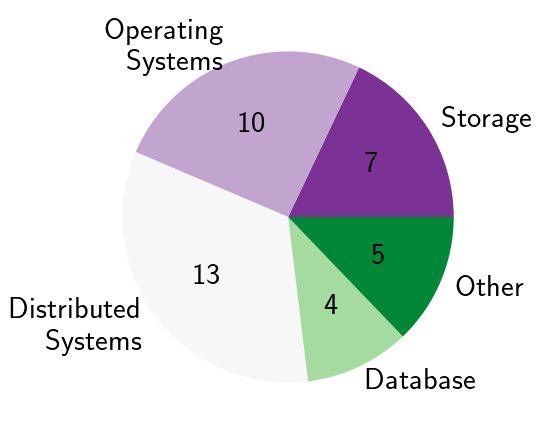

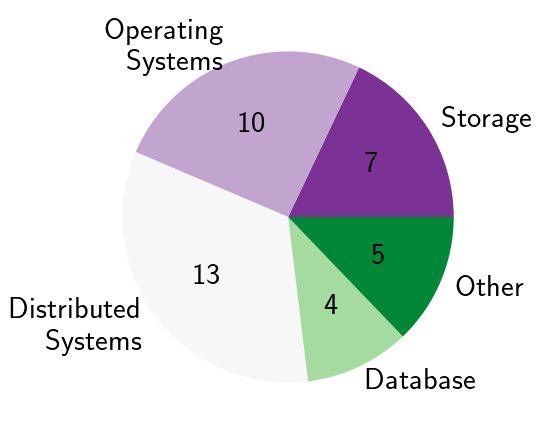

In [19]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

fig, ax = pyplt.subplots()
ax.pie(courseagg_df[0], labels=courseagg_df["index"], autopct=autopct_format(courseagg_df[0]),
      colors=brewer_colors)
pyplt.rcParams.update({'font.size': 22})

fig.tight_layout()
fig.savefig("stosys_courses.pdf")
fig

In [328]:
topicagg_df = aggdf.groupby("topic")["count"].sum().reset_index()
topicagg_df["topic"] = topicagg_df["topic"].str.replace("Dist. Storage", "Distributed\nStorage")
topicagg_df["topic"] = pd.Categorical(topicagg_df["topic"], reversed(["Filesystem", "SSD", "FTL", "NVMe", "KV", "Distributed\nStorage"]), ordered=True)
topicagg_df

/var/folders/jp/kcn5ldrd1279m_wgrm1vvnvr0000gn/T/ipykernel_51509/2746646592.py:2: FutureWarning: The default value of regex will change from True to False in a future version.


,topic,count
0,Distributed\nStorage,24
1,KV,8
2,NVMe,7
3,FTL,2
4,SSD,10
5,Filesystem,16


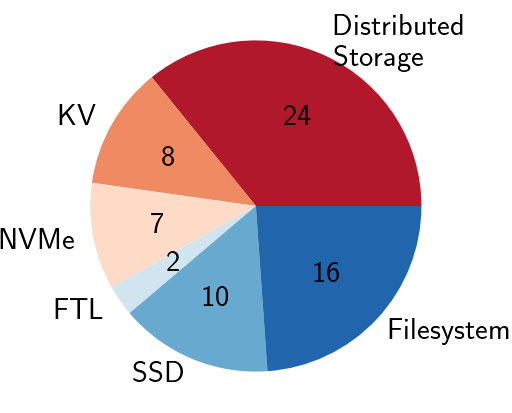

In [330]:
brewer6_colors = ["#b2182b","#ef8a62","#fddbc7","#d1e5f0","#67a9cf","#2166ac"]

fig, ax = pyplt.subplots()
ax.pie(topicagg_df["count"], labels=topicagg_df["topic"], autopct=autopct_format(topicagg_df["count"]),
      colors=brewer6_colors)
pyplt.rcParams.update({'font.size': 22})

fig.tight_layout()
fig.savefig("stosys_topics.pdf")
fig